In [9]:
!pip install tensorflow

In [52]:
import tensorflow as tf
print(tf.__version__)

a = tf.Variable(1, name="a")
b = tf.Variable(2, name="b")

f = a + b

init = tf.global_variables_initializer()
with tf.Session() as s:
    init.run();
    print(f.eval())

1.13.1
3


In [13]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

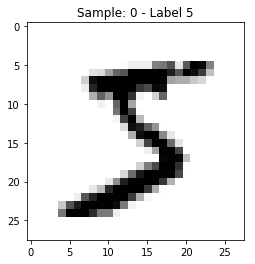

In [25]:
import matplotlib.pyplot as plt

def display_sample(index):
    label = y_train[index]
    
    image = x_train[index].reshape([28, 28])
    
    plt.title('Sample: %d - Label %d' % (index, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(0)

<IPython.core.display.Javascript object>


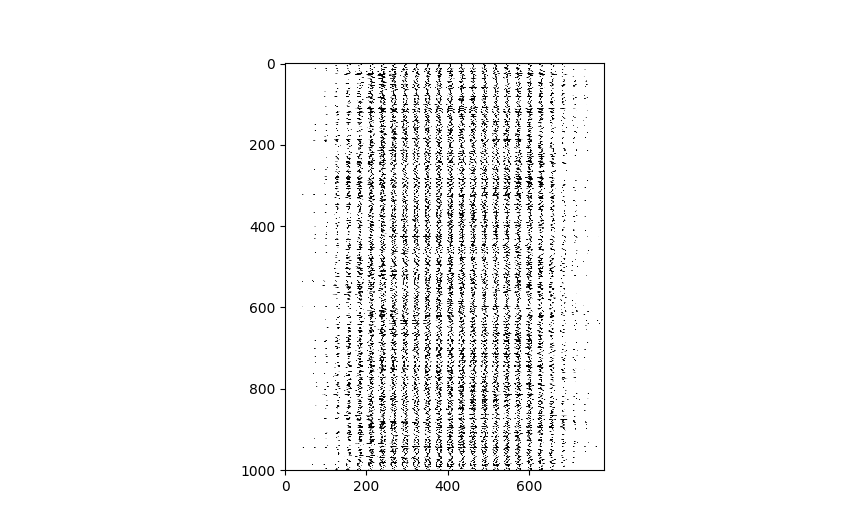

In [56]:
import numpy as np
%matplotlib notebook
def howNNSees(start, end):
    images = x_train[start].reshape([1,784])
    for i in range(start+1, end):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show();

howNNSees(0, 1000)

In [36]:
input_images = tf.placeholder(tf.float32, shape=[None, 784])
target_labels = tf.placeholder(tf.float32, shape=[None, 10])

In [37]:
hidden_nodes = 512

input_weights = tf.Variable(tf.truncated_normal([784, hidden_nodes]))
input_biases = tf.Variable(tf.zeros([hidden_nodes]))

hidden_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 10]))
hidden_biases = tf.Variable(tf.zeros(10))

In [38]:
input_layer = tf.matmul(input_images, input_weights)
hidden_layer = tf.nn.relu(input_layer + input_biases)
digit_weights = tf.matmul(hidden_layer, hidden_weights) + hidden_biases

In [40]:
loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=digit_weights, labels=target_labels))

In [41]:
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss_function)

In [43]:
correct_prediction = tf.equal(tf.argmax(digit_weights, 1), tf.argmax(target_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [54]:
tf.global_variables_initializer().run()

for x in range(2000):
    x_batch = mnist.train.next_batch(100)
    y_batch = mnist.train.next_batch(100)
    optimizer.run(feed_dict={input_images: x_batch, target_labels: y_batch})
    if((x+1) % 100 == 0):
        print("Training epoch " + str(x+1))
        print("Accuracy: " + str(accuracy.eval(feed_dict={input_images: x_test, target_labels: y_test})))

AttributeError: module 'tensorflow._api.v1.keras.datasets.mnist' has no attribute 'train'